In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../../Hi-C-embedding/GraphEmbedding")
sys.path.append("../../utilities/")
import data_utils
from ge.models import deepwalk, line, sdne
import networkx as nx
from sklearn.manifold import TSNE

In [3]:
SC_annot = data_utils.read_annot_file('../../data/GM12878/annotations/GSE63525_GM12878_subcompartments.bed', 0, 100000,0)
SC_annot = data_utils.melt_annotation(SC_annot)
def make_embedding_df(embeddings):
    embeddings = data_utils.make_embedding_df(embeddings,"../../data",'GM12878',100000)
    tsne_comps = TSNE(n_components=2,init='random').fit_transform(embeddings.iloc[:,2:])
    embeddings['tsne1'] = tsne_comps[:,0]
    embeddings['tsne2'] = tsne_comps[:,1]
    embeddings = pd.merge(embeddings, SC_annot, on = ['pos','chr_name'], how = 'inner')
    return embeddings

In [4]:
contact_list = data_utils.create_contact_list("../../data", 'GM12878', 'chr21', 'chr21', 100000, 'oe')
contact_list = contact_list.nlargest(10000, 'weight')
#uni_contact_list = data_utils.uni_dir(contact_list)
bi_contact_list = data_utils.bi_dir(contact_list)
#full_contact_list = data_utils.loop_bi_dir(contact_list)

#uni_G = nx.from_pandas_edgelist(uni_contact_list, 'id1', 'id2', edge_attr = 'weight', create_using=nx.DiGraph())
bi_G = nx.from_pandas_edgelist(bi_contact_list, 'id1', 'id2', edge_attr = 'weight', create_using=nx.DiGraph())
#full_G = nx.from_pandas_edgelist(full_contact_list, 'id1', 'id2', edge_attr = 'weight', create_using=nx.DiGraph())

../../utilities/data_utils.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  contact_list.sort_values(['id1','id2'], inplace = True)


In [15]:
###LINE###
#uni_line_1st_model = line.LINE(uni_G,embedding_size=128,order='first') #init model,order can be ['first','second','all']
#uni_line_1st_model.train(batch_size=1024,epochs=15,verbose=2)# train model
#uni_line_1st_embeddings = uni_line_1st_model.get_embeddings()# get embedding vectors
#uni_line_1st_embeddings = make_embedding_df(uni_line_1st_embeddings)
###LINE###
#uni_line_2nd_model = line.LINE(uni_G,embedding_size=128,order='second') #init model,order can be ['first','second','all']
#uni_line_2nd_model.train(batch_size=1024,epochs=15,verbose=2)# train model
#uni_line_2nd_embeddings = uni_line_2nd_model.get_embeddings()# get embedding vectors
#uni_line_2nd_embeddings = make_embedding_df(uni_line_2nd_embeddings)

In [16]:
bi_line_1st_embeddings = {}
for dim in [4,16,64,128]:
    bi_line_1st_model = line.LINE(bi_G,embedding_size=dim,order='first') #init model,order can be ['first','second','all']
    bi_line_1st_model.train(batch_size=1024,epochs=15,verbose=2)# train model
    bi_line_1st_embeddings[dim] = bi_line_1st_model.get_embeddings()# get embedding vectors
    bi_line_1st_embeddings[dim] = make_embedding_df(bi_line_1st_embeddings[dim])

Epoch 1/15
1s - loss: 0.8624
Epoch 2/15
1s - loss: 0.7075
Epoch 3/15
1s - loss: 0.6955
Epoch 4/15
1s - loss: 0.6945
Epoch 5/15
1s - loss: 0.6940
Epoch 6/15
1s - loss: 0.6937
Epoch 7/15
1s - loss: 0.6935
Epoch 8/15
1s - loss: 0.6934
Epoch 9/15
1s - loss: 0.6934
Epoch 10/15
1s - loss: 0.6933
Epoch 11/15
1s - loss: 0.6932
Epoch 12/15
1s - loss: 0.6932
Epoch 13/15
1s - loss: 0.6932
Epoch 14/15
1s - loss: 0.6932
Epoch 15/15
1s - loss: 0.6932
Epoch 1/15
1s - loss: 1.5502
Epoch 2/15
1s - loss: 0.7532
Epoch 3/15
1s - loss: 0.7042
Epoch 4/15
1s - loss: 0.6994
Epoch 5/15
1s - loss: 0.6972
Epoch 6/15
1s - loss: 0.6959
Epoch 7/15
1s - loss: 0.6950
Epoch 8/15
1s - loss: 0.6944
Epoch 9/15
1s - loss: 0.6940
Epoch 10/15
1s - loss: 0.6937
Epoch 11/15
1s - loss: 0.6936
Epoch 12/15
1s - loss: 0.6935
Epoch 13/15
1s - loss: 0.6934
Epoch 14/15
1s - loss: 0.6933
Epoch 15/15
1s - loss: 0.6933
Epoch 1/15
2s - loss: 4.8886
Epoch 2/15
2s - loss: 0.8809
Epoch 3/15
2s - loss: 0.7388
Epoch 4/15
2s - loss: 0.7207
Ep

In [17]:
bi_line_2nd_embeddings = {}
for dim in [4,16,64,128]:
    bi_line_2nd_model = line.LINE(bi_G,embedding_size=dim,order='second') #init model,order can be ['first','second','all']
    bi_line_2nd_model.train(batch_size=1024,epochs=15,verbose=2)# train model
    bi_line_2nd_embeddings[dim] = bi_line_2nd_model.get_embeddings()# get embedding vectors
    bi_line_2nd_embeddings[dim] = make_embedding_df(bi_line_2nd_embeddings[dim])

Epoch 1/15
1s - loss: 0.8694
Epoch 2/15
1s - loss: 0.7105
Epoch 3/15
1s - loss: 0.6842
Epoch 4/15
1s - loss: 0.5864
Epoch 5/15
1s - loss: 0.4753
Epoch 6/15
1s - loss: 0.4500
Epoch 7/15
1s - loss: 0.4491
Epoch 8/15
1s - loss: 0.4485
Epoch 9/15
1s - loss: 0.4484
Epoch 10/15
1s - loss: 0.4483
Epoch 11/15
1s - loss: 0.4483
Epoch 12/15
1s - loss: 0.4459
Epoch 13/15
1s - loss: 0.4481
Epoch 14/15
1s - loss: 0.4482
Epoch 15/15
1s - loss: 0.4482
Epoch 1/15
1s - loss: 1.6023
Epoch 2/15
1s - loss: 0.7671
Epoch 3/15
1s - loss: 0.6804
Epoch 4/15
1s - loss: 0.5401
Epoch 5/15
1s - loss: 0.4569
Epoch 6/15
1s - loss: 0.4488
Epoch 7/15
1s - loss: 0.4504
Epoch 8/15
1s - loss: 0.4501
Epoch 9/15
1s - loss: 0.4498
Epoch 10/15
1s - loss: 0.4497
Epoch 11/15
1s - loss: 0.4494
Epoch 12/15
1s - loss: 0.4470
Epoch 13/15
1s - loss: 0.4492
Epoch 14/15
1s - loss: 0.4491
Epoch 15/15
1s - loss: 0.4491
Epoch 1/15
2s - loss: 5.0954
Epoch 2/15
2s - loss: 0.9104
Epoch 3/15
2s - loss: 0.6368
Epoch 4/15
2s - loss: 0.4874
Ep

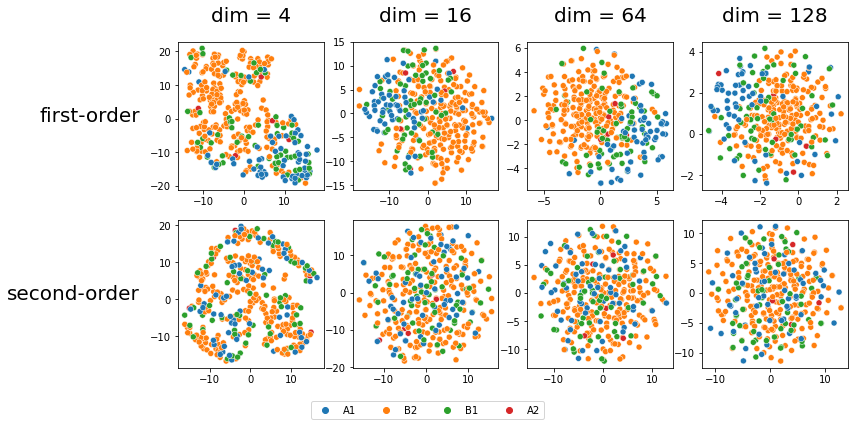

In [27]:
fig, axs = plt.subplots(2,4,figsize=(12,6))
for i,o in enumerate(['1st','2nd']):
    for j,dim in enumerate([4,16,64,128]):
        data_name = 'bi_line_' + o + '_embeddings'
        sns.scatterplot(data=eval(data_name)[dim], x = 'tsne1', y = 'tsne2', hue = 'label', ax = axs[i,j])
        axs[i,j].get_legend().remove()
        axs[i,j].set(xlabel = None, ylabel = None)
        
pad = 2 # in points

for ax, col in zip(axs[0], ["dim = " + str(dim) for dim in [4,16,64,128]]):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 10*pad),
                xycoords='axes fraction', textcoords='offset pixels',
                size=20, ha='center', va='baseline')

for ax, row in zip(axs[:,0], ['first-order', 'second-order']):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset pixels',
                size=20, ha='right', va='center')
    
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, prop={'size': 10})
fig.savefig(os.path.join('figures', "line_chr21_dims.png"), 
            format="png", dpi=144, bbox_inches="tight", pad_inches=0.2, facecolor='white', transparent=False)

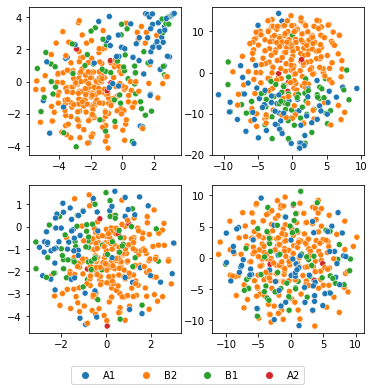

In [10]:
fig, axs = plt.subplots(2,2,figsize=(6,6))
for i,e in enumerate(['uni','bi']):
    for j,o in enumerate(['1st','2nd']):
        data_name = e + '_line_' + o + '_embeddings'
        sns.scatterplot(data=eval(data_name), x = 'tsne1', y = 'tsne2', hue = 'label', ax = axs[i,j])
        axs[i,j].get_legend().remove()
        axs[i,j].set(xlabel = None, ylabel = None)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, prop={'size': 10})

In [12]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, adjusted_rand_score, silhouette_score, davies_bouldin_score


def svc_classify(x, y):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    accuracies = []
    f1_scores = []
    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)
        classifier = SVC(C=100000)
        classifier.fit(x_train, y_train)
        classifier_results = classifier.predict(x_test)
        accuracies.append(accuracy_score(y_test, classifier_results))
        f1_scores.append(f1_score(y_test, classifier_results, average = 'micro'))
    return {"accuracy": np.mean(accuracies), "f1": np.mean(f1_scores)}

def rf_classify(x,y):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    accuracies = []
    f1_scores = []
    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = RandomForestClassifier(max_depth=5, random_state=0)
        clf.fit(x_train, y_train)
        classifier_results = clf.predict(x_test)
        accuracies.append(accuracy_score(y_test, classifier_results))
        f1_scores.append(f1_score(y_test, classifier_results, average = 'micro'))
    return {"accuracy": np.mean(accuracies), "f1": np.mean(f1_scores)}

def embeddings_compartmentalization_evaluation(embeddings, labels):
    svc_scores = svc_classify(embeddings, labels)
    rf_scores = rf_classify(embeddings, labels)
    kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=0).fit(embeddings)
    predicted_clusters = kmeans.labels_
    ars = adjusted_rand_score(predicted_clusters, labels)
    ss = silhouette_score(embeddings, labels)
    dbs = davies_bouldin_score(embeddings, labels)
    return {'svc_f1': svc_scores['f1'], 'rf_f1': rf_scores['f1'], 'adjusted_rand_score': ars,
           'silhouette_score': ss, 'davies_bouldin_score': dbs}

def linear_reg(x, y):
    reg_scores = []
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        reg = LinearRegression().fit(x_train, y_train)
        reg_score = reg.score(x_test, y_test)
        reg_scores.append(reg_score)
    return (np.mean(reg_scores))



In [13]:
results = {}

features = np.array(uni_line_1st_embeddings.iloc[:,2:130])
labels = np.array(uni_line_1st_embeddings.iloc[:,132])
results['uni', 'first'] = embeddings_compartmentalization_evaluation(features, labels)

features = np.array(bi_line_1st_embeddings.iloc[:,2:130])
labels = np.array(bi_line_1st_embeddings.iloc[:,132])
results['bi', 'first'] = embeddings_compartmentalization_evaluation(features, labels)

features = np.array(uni_line_2nd_embeddings.iloc[:,2:130])
labels = np.array(uni_line_2nd_embeddings.iloc[:,132])
results['uni', 'second'] = embeddings_compartmentalization_evaluation(features, labels)

features = np.array(bi_line_2nd_embeddings.iloc[:,2:130])
labels = np.array(bi_line_2nd_embeddings.iloc[:,132])
results['bi', 'second'] = embeddings_compartmentalization_evaluation(features, labels)

/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserW

In [14]:
results

{('uni', 'first'): {'svc_f1': 0.7207142857142858,
  'rf_f1': 0.6980952380952381,
  'adjusted_rand_score': 0.4005398345982623,
  'silhouette_score': -0.03514406099463773,
  'davies_bouldin_score': 5.869376143425093},
 ('bi', 'first'): {'svc_f1': 0.738015873015873,
  'rf_f1': 0.6553968253968254,
  'adjusted_rand_score': 0.241446944975613,
  'silhouette_score': -0.015865926364427626,
  'davies_bouldin_score': 8.363067995270097},
 ('uni', 'second'): {'svc_f1': 0.7209523809523809,
  'rf_f1': 0.6607936507936507,
  'adjusted_rand_score': 0.18511594482426535,
  'silhouette_score': -0.02327437614928775,
  'davies_bouldin_score': 6.578783934691431},
 ('bi', 'second'): {'svc_f1': 0.6326984126984128,
  'rf_f1': 0.6353968253968253,
  'adjusted_rand_score': -0.002349101455493188,
  'silhouette_score': -0.03743234337375527,
  'davies_bouldin_score': 10.070546655192093}}